# Interactive Python using jupyter notebooks

- Notebooks are made of a sequence of cells
- Cells can contain different content such as Python code, or Markdown
- You can change the cell type in the toolbar
- To execute a cell press "Shift+Return"
- Use the tool bar to add, delete, copy, or insert cells

(Note: to learn more about Markdown check [Daring Fireball's website](https://daringfireball.net/projects/markdown/syntax))

## Import the Python package for numerical arrays (numpy)

In [1]:
import numpy as np

## Define a function that creates some statistical data

In [2]:
def load_data():    
    # Goalkeeper, defender, midfielder, attacker
    possible_positions = ['GK', 'D', 'M', 'A']
    N = 100
    positions = []
    heights = []
    for i in range(0,N):
        positions.append(possible_positions[np.random.randint(len(possible_positions))])
        heights.append(np.random.normal(loc=180.0,scale=5.0))
    return positions, heights

## Read the data

In [3]:
positions, heights = load_data()

The objects ```positions``` and ```heights``` are lists as we can check using the Python function ```type```:

In [4]:
print(type(positions))
print(type(heights))

<class 'list'>
<class 'list'>


Question: *How many items are inside the lists ```positions``` and ```heights```?

Hint: Use the Python function ```len```. 

In [6]:
print(len(heights),len(positions))


100 100


## Convert to numpy arrays

In [7]:
np_positions = np.array(positions)
np_heights = np.array(heights)

Question: *what is the data type of ```np_positions``` and ```np_heights```*?<br>
Question: *what is the shape of ```np_positions``` and ```np_heights```*?


Hint: Numpy objects have member functions called ```dtype``` and ```shape```.

In [11]:
print(np_positions.dtype) # unicode string
print(np_positions.size)
print(np_heights.size)

<U2
100
100


## Extract the heights of the goalkeepers

In [12]:
gk_heights = np_heights[np_positions == 'GK']

## Print the median of the goalkeepers heights

In [13]:
print("Median height of goalkeepers: " + str(np.median(gk_heights)))

Median height of goalkeepers: 179.9185956438085


Question: *what is the median height of all the field players*?<br>
Question: *what is the median height of all the attackers*?<br>
Question: *what is the median height of goalkeepers and the attackers combined?*

In [27]:
field_players = np_heights[np_positions != 'GK']
print(np.median(field_players))
attackers = np_heights[np_positions == 'A']
print(np.median(attackers))
print(np.median(np.append(gk_heights, attackers)))


180.65500303177012
180.34846537594464
179.9185956438085


In [28]:
## More statistical tests

Besides the ```median```, numpy als comes with the functions ```mean```, ```std```, ```min``` and ```max``` which are useful for investigating statistical data. 

Question: *Who is the shortest player (which position)*?<br>
Question: *Who is the tallest player (which position)*?

In [44]:
p = np_positions[np.argmin(np_heights)]
h = np.amin(np_heights)
print(p, h)

p = np_positions[np.argmax(np_heights)]
h = np.amax(np_heights)
print(p, h)

GK 167.36432984767376
A 190.20292797860174


## Data plotting

For plotting, we need the package matplotlib

In [45]:
import matplotlib.pyplot as plt

There are different display modes for matplotlib plots inside a jupyter notebook.

In [49]:
# For inline plots use
%matplotlib inline

In [50]:
# For inline plots with interactive capabilities use
# %matplotlib notebook

Lets visualize the height distribution of the defenders

In [51]:
d_heights = np_heights[np_positions == 'D']

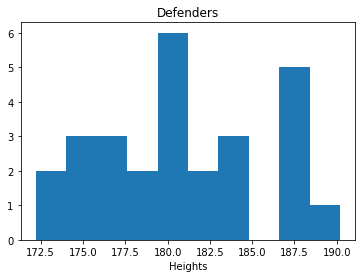

In [52]:
plt.figure()
plt.hist(d_heights)
plt.title('Defenders')
plt.xlabel('Heights')
plt.show()

To figure out the tallest/shortest player, we can the max/min within each position

In [53]:
p = ['GK', 'D', 'M', 'A']
p_max = [np_heights[np_positions == i].max() for i in p]

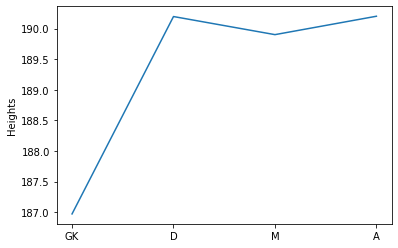

In [54]:
plt.figure()
plt.plot(range(len(p)), p_max)
plt.gca().xaxis.set_ticks(range(len(p)))
plt.gca().xaxis.set_ticklabels(p)
plt.ylabel('Heights')
plt.show()

For inspiration on data plotting and more examples, check out the matplotlib gallery: [https://matplotlib.org/gallery.html](https://matplotlib.org/gallery.html)